示例：用户维度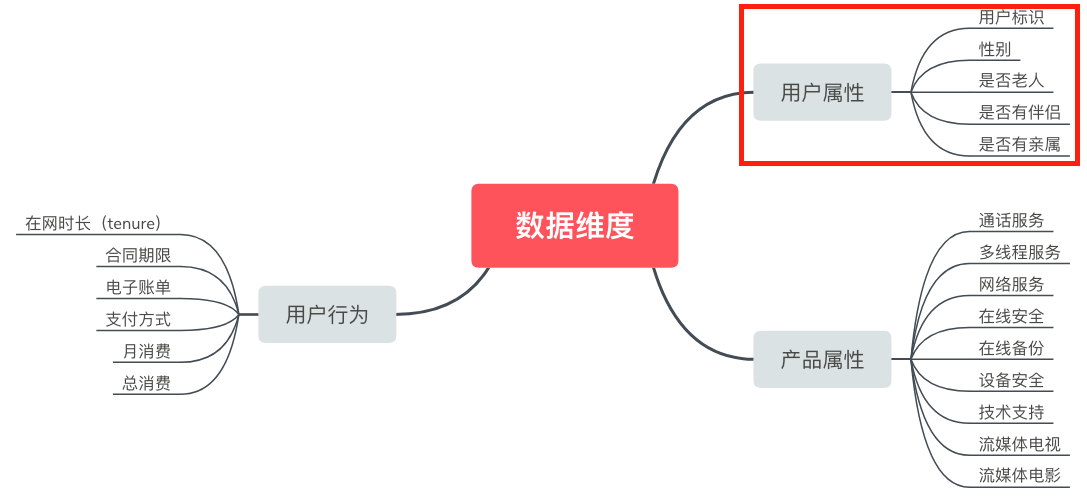

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,用户id,性别,是否老人,是否有伴侣,是否有亲属,在网时长,通话服务,多线程,网络服务,在线安全,...,设备安全,技术支持,流媒体电视,流媒体电影,合同期限,电子账单,支付方式,月消费,总消费,是否流失
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 4.4.1 整体流失情况：人数、比例、流失率

In [5]:
data['是否流失'].drop_duplicates()

0     No
2    Yes
Name: 是否流失, dtype: object

In [6]:
# 流失人数、非流失人数
churn1 = data[data['是否流失']=='Yes']['是否流失'].count()
churn0 = data[data['是否流失']=='No']['是否流失'].count()

In [7]:
churn0,churn1

(5174, 1869)

In [8]:
# 流失率 = 流失人数 / 总人数
churn_per = churn1 / len(data)

In [9]:
churn_per # 整体流失率

0.2653698707936959

In [10]:
# 创建一个churn=yes的子数据集
df_churn = data[data['是否流失']=='Yes']
df_churn

,用户id,性别,是否老人,是否有伴侣,是否有亲属,在网时长,通话服务,多线程,网络服务,在线安全,...,设备安全,技术支持,流媒体电视,流媒体电影,合同期限,电子账单,支付方式,月消费,总消费,是否流失
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [11]:
# 4.4.2 性别：人数、比例、流失率

In [12]:
data['性别'].drop_duplicates()

0    Female
1      Male
Name: 性别, dtype: object

In [13]:
gender0 = data[data['性别']=='Female']['性别'].count()
gender1 = data[data['性别']=='Male']['性别'].count()

In [14]:
gender0,gender1

(3488, 3555)

In [15]:
gender0 / len(data) # 女性占人数总量%

0.495243504188556

In [16]:
# 女性流失率：女性流失人数 / 女性总人数
g0_churn = len(df_churn[df_churn['性别']=='Female']) / gender0
g0_churn 

0.26920871559633025

In [17]:
g1_churn = len(df_churn[df_churn['性别']=='Male']) / gender1
g1_churn 

0.2616033755274262

In [18]:
# 4.4.3 老人：人数、比例、流失率

In [19]:
data['是否老人'].drop_duplicates()

0     0
20    1
Name: 是否老人, dtype: int64

In [20]:
senior0 = len(data[data['是否老人']==0])
senior1 =len(data[data['是否老人']==1])

In [21]:
senior0,senior1

(5901, 1142)

In [22]:
senior1 / len(data) # 老年人占比

0.1621468124378816

In [23]:
# 计算对应的流失率：对应流失人数 / 对应总人数
s0_churn = len(df_churn[df_churn['是否老人']==0]) / senior0
s1_churn = len(df_churn[df_churn['是否老人']==1]) / senior1

In [24]:
s0_churn,s1_churn

(0.23606168446026096, 0.4168126094570928)

In [25]:
# 4.4.4 伴侣：人数、比例、流失率

In [26]:
data['是否有伴侣'].drop_duplicates()

0    Yes
1     No
Name: 是否有伴侣, dtype: object

In [27]:
partner0 = len(data[data['是否有伴侣']=='No'])
partner1 =len(data[data['是否有伴侣']=='Yes'])

In [28]:
partner0,partner1,partner1/len(data)

(3641, 3402, 0.4830327985233565)

In [29]:
p0_churn = len(df_churn[df_churn['是否有伴侣']=='No']) / partner0
p1_churn = len(df_churn[df_churn['是否有伴侣']=='Yes']) / partner1

In [30]:
p0_churn,p1_churn,p0_churn/p1_churn # 单身用户更倾向于流失

(0.32957978577313923, 0.1966490299823633, 1.6759797177880713)

In [31]:
# 4.4.5 亲属：人数、比例、流失率

In [32]:
data['是否有亲属'].drop_duplicates()

0     No
6    Yes
Name: 是否有亲属, dtype: object

In [33]:
depend0 = len(data[data['是否有亲属']=='No'])
depend1 =len(data[data['是否有亲属']=='Yes'])

In [34]:
depend0,depend1,depend1/len(data)

(4933, 2110, 0.2995882436461735)

In [35]:
d0_churn = len(df_churn[df_churn['是否有亲属']=='No']) / depend0
d1_churn = len(df_churn[df_churn['是否有亲属']=='Yes']) / depend1

In [36]:
d0_churn, d1_churn, d0_churn/d1_churn # 无亲属相对有亲属更容易流失

(0.3127914048246503, 0.15450236966824646, 2.024508785828258)

In [37]:
# 4.4.6 数据洞察：现象、溯源、建议

In [38]:
# 高流失率用户特征（画像）
# 1. 性别无特殊性
# 2. 是否老年人: 老年人相对于非老年人，更容易流失
# 3. 是否有伴侣: 单身用户更倾向于流失
# 4. 是否有亲属: 无亲属（孩子）相对有亲属更容易流失